***Press enter to start***
***Start recording, press enter to stop***
***End recording***
***Start writing output***
***End writing output***
[('B5', 0.07), ('D#4', 0.6000000000000001), ('D4', 0.16999999999999993), ('D#4', 0.16000000000000003), ('D4', 0.3700000000000001), ('D#4', 0.3699999999999999), ('F4', 1.3699999999999999), ('D#4', 0.3700000000000001)]


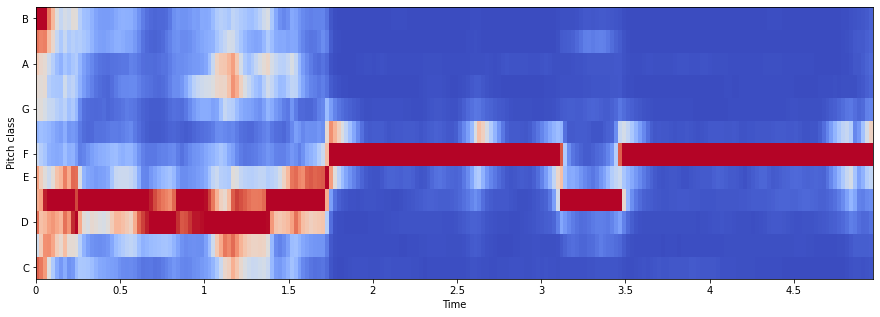

note_values_with_octave:  214 [60 60 60 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40
 40 40 40 40 40 39 39 39 39 39 39 39 40 40 40 40 40 40 40 39 39 39 39 39
 39 39 39 39 39 39 39 39 39 39 39 40 40 40 40 40 40 40 40 40 40 40 40 40
 40 40 40 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42
 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42
 42 42 42 42 42 42 42 42 42 42 42 42 42 42 40 40 40 40 40 40 40 40 40 40
 40 40 40 40 40 40 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42
 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42
 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42]
Playing B5 (987.77 Hz) for 0.07s
Playing D4# (311.13 Hz) for 0.6000000000000001s
Playing D4 (293.66 Hz) for 0.16999999999999993s
Playing D4# (311.13 Hz) for 0.16000000000000003s
Playing D4 (293.66 Hz) for 0.3700000000000001s
Playing D4# (311.13 Hz) for 0.3699999999999999s
Playing F4 (349.23 Hz) for 1.3699999999999999

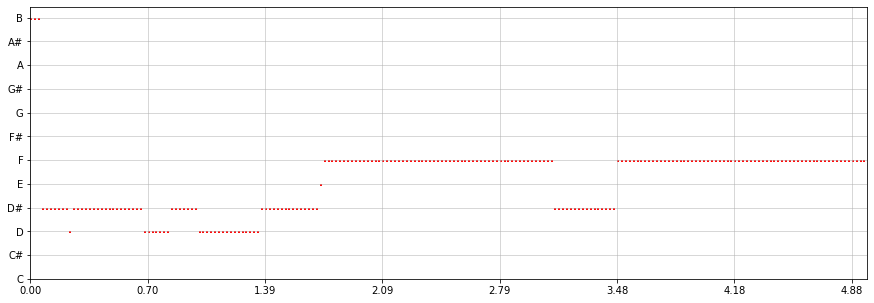

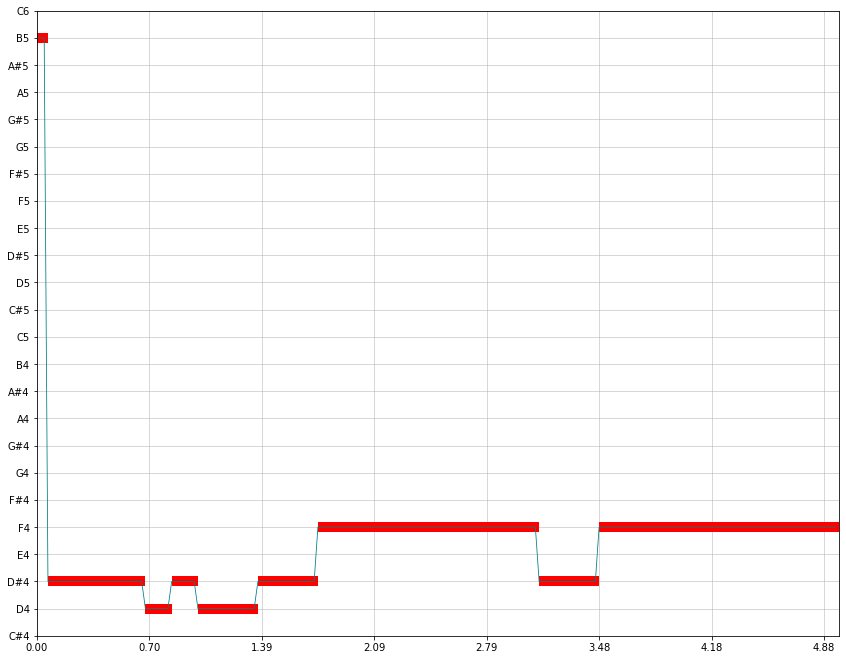

In [3]:
import numpy as np
import IPython.display as ipd
import pandas as pd
import util.Singya as Singya
import os
import IPython


singya = Singya.Singya()
singya.record_song()
singya.load_song()
# singya.draw_wave()
singya.draw_chromagram()
singya.draw_scatter()
singya.draw_hlines()
# singya.play_recorded_song()
singya.play_detected_notes()

In [2]:
# singya.play_recorded_song()
os.getcwd()

'd:\\Projects\\py-projects\\singya'

In [5]:
# TOTO: play the detected notes
import musicalbeeps
player = musicalbeeps.Player(volume = 0.3, mute_output = False)

# To play an A on default octave n°4 for 0.2 seconds
player.play_note("C", 1)
player.play_note("D", 1)
player.play_note("E", 1)
player.play_note("F", 1)
player.play_note("G", 1)
player.play_note("A", 1)
player.play_note("B", 1)



Playing C (261.63 Hz) for 1s
Playing D (293.66 Hz) for 1s
Playing E (329.63 Hz) for 1s
Playing F (349.23 Hz) for 1s
Playing G (392.00 Hz) for 1s
Playing A (440.00 Hz) for 1s
Playing B (493.88 Hz) for 1s


In [32]:
# Draw guitar sheet
from PIL import Image, ImageFont, ImageDraw

emptySheet = Image.open("./emptySheet.png")

print(emptySheet.format, emptySheet.size, emptySheet.mode)

draw = ImageDraw.Draw(emptySheet)

fontsize = 15  # starting font size
level = 8
text = str(level)
font = ImageFont.truetype("arial.ttf", fontsize)
font.getsize("8")
draw.rectangle((100, 50, 110, 60), fill='white')
draw.text((100, 50), "8", fill="blue", font=font)

# emptySheet.show()
emptySheet.save("test.png")

PNG (855, 125) RGBA
